## Определение
Выпуклой оболочкой множества точек называется пересечение всех выпуклых множеств, содержащих все заданные точки.


## Алгоритм Джарвиса
По-другому этот алгоритм называется "алгоритм заворачивания подарка". Он заключается в том, что мы ищем выпуклую оболочку последовательно, против часовой стрелки, начиная с определенной точки.
### Алгоритм
1. Берем самую нижнюю левую точку $p_0$.
2. За $O(n)$ перебираем все точки, берем точку с минимальным полярным углом относительно $p_0$.
3. Добавляем выбранную точку в оболочку, проделываем то же самое с ней и т. д.
4. Если в какой-то момент найденная на шаге 2 точка совпала с $p_0$, то останавливаемся.

Пояснение: Пусть мы  на шаге 2 хотим проверить какая точка $p_i$ или $p_j$ имеет меньший угол. Это эквивалентно тому, что предикат поворота $turn(p_0, p_i, p_j)$  будет меньше 0.
![Пример](images/jarvis.png)
### Корректность
Пусть после завершения Джарвиса осталась точка $P$, не лежащая внутри полученной оболочки.
Это значит, что она лежит справа от некоторого ребра $AB$ (считаем, что ребра оболочки упорядочены против часовой стрелки, так что все внутренние точки лежат слева от них).
Но тогда $P$ меньше по повороту относительно $A$ чем $B$. Значит, мы должны были выбрать ее, ане $B$, для построения очередного ребра оболочки, когда мы рассматривали точку $A$. Противоречие.
Следовательно, такой точки $P$ не существует.
### Сложность
Добавление каждой точки в ответ занимает $O(n)$ времени, всего точек будет $k$, поэтому итоговая сложность $O(nk)$. В худшем случае, когда оболочка состоит из всех точек сложность $O(n^2)$.

In [3]:
from utils import *
TURN_LEFT, TURN_RIGHT, TURN_NONE = (1, -1, 0)

def next_point(points, p):
    #перебираем все точки и находим ту, у которой минимальный полярный угол относительно текущей точки p
    q = p
    for r in points:
        t = turn(p, q, r)
        if t == TURN_RIGHT or t == TURN_NONE and dist(r, p) > dist(q, p):
            q = r
    return q

def convex_hull(points):
    #строим выпуклую оболочку и возвращаем точки в порядке обхода против часовой стрелки
    hull = [min(points)]
    for p in hull:
        q = next_point(points, p)
        if q != hull[0]:
            hull.append(q)
    return hull

In [4]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)

points = [[0, 2], [0, 0], [2, 0], [2, 2], [1, 1]]
ch = convex_hull(points)
print(ch)

[[0, 0], [2, 0], [2, 2], [0, 2]]


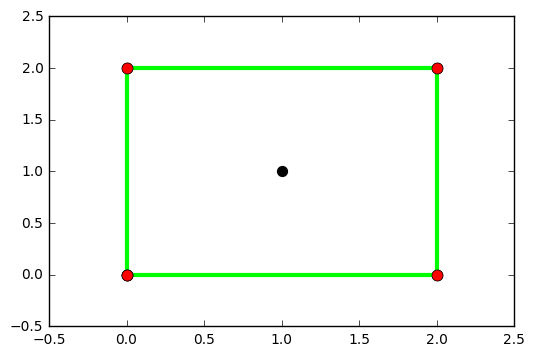

In [5]:
xs = [x[0] for x in points]
ys = [x[1] for x in points]
plt.scatter(xs, ys, color="black",  s = 50)
x = [x[0] for x in ch]
y = [x[1] for x in ch]
x.append(x[0])
y.append(y[0])
plt.plot(x, y, 'k-', color='#00ff00', linewidth=3)
plt.plot(x, y, 'o', color='red', markersize=8)
plt.show()


## Алгоритм Грэхема
### Описание
1. Находим точку $p_0$ нашего множества с самой маленькой $у$-координатой (если таких несколько, берем самую правую из них), добавляем в ответ.
2. Сортируем все остальные точки по полярному углу относительно $p_0$.
3. Добавляем в ответ $p_1$ - самую первую из отсортированных точек.
4. Берем следующую по счету точку $t$. Пока $t$ и две последних точки в текущей оболочке $p_i$ и $p_{i-1}$ образуют неправый поворот (вектора $p_i$ $t$ и $p_{i-1}$ $p_i$), удаляем из оболочки $p_i$.
5. Добавляем в оболочку $t$.
6. Делаем п.5, пока не закончатся точки.

### Корректность
Докажем, что на каждом шаге множество $p_i$-тых является выпуклой оболочкой всех уже рассмотренных точек. Доказательство проведем по индукции.
- База. Для трех первых точек утверждение, очевидно, выполняется.
- Переход. Пусть для $i-1$ точек оболочки совпадают. Докажем, что и для $i$ точек они совпадут.
Рассмотрим истинную оболочку $ch(S \cup {i}) = ch(S) \cup i \setminus P$, где $P$ - множество всех точек из $ch(S)$, видимых из $i$. Так как мы добавляли точки в нашу оболочку против часовой стрелки и так как $i$-тая точка лежит в $ch(S \cup i)$, то $P$ состоит из нескольких подряд идущих последних добавленных в оболочку точек, и именно их мы удаляем на текущем шаге. Поэтому наша оболочка и истинная для $i$ точек совпадают.
Тогда по индукции оболочки совпадают и для $i = n$.

### Сложность
Сортировка точек занимает $O(n \log n)$ времени. При обходе каждая точка добавляется в ответ не более одного раза, поэтому сложность этой части - $O(n)$. Суммарное время — $O(n \log n)$.

In [19]:
from utils import *
from examples import *
import functools as fc
fst = [0, 0]

def compare(x, y):
    return (turn(fst, x, y) != TURN_RIGHT)

def grahamscan(points):
    n = len(points) # число точек
    ind = list(range(n)) # список номеров точек
    for i in range(1,n):
        if points[ind[i]][0] < points[ind[0]][0]: # если P[i]-ая точка лежит левее P[0]-ой точки
            ind[i], ind[0] = ind[0], ind[i] # меняем местами номера этих точек 
    
    fst = points[0]
    points= sorted(points, key=fc.cmp_to_key(compare))
    print(points)
    
    st = [ind[0], ind[1]] # создаем стек
    for i in range(2, n):
        print(st)
        while turn(points[st[len(st)-2]], points[st[len(st)-1]], points[ind[i]]) == TURN_RIGHT:
            del st[-1] # pop(S)
        st.append(ind[i]) # push(S,P[i])
    return st

In [20]:
points = example1
ch = grahamscan(points)
for i in ch:
    print(points[i])

[[5.0, 0.0], [5.0, 1.0], [7.0, 3.0], [4.0, 4.0], [4.5, 3.0], [1.0, 7.0]]
[5, 1]
[5, 1, 2]
[5, 0]
[5, 0, 4]
[1.0, 7.0]
[5.0, 0.0]
[4.5, 3.0]
[4.0, 4.0]


## Алгоритм Эндрю
### Описание
1. Возьмем самую левую и самую правую точки - $p_0$ и $p_n$
2. Разделим все множество точек на "верхние"и "нижние" - точки выше прямой $p_0p_n$ и ниже ее, соответственно.
3. Для "верхних"и "нижних"точек построим верхнюю и нижнюю оболочку соответственно. Строить будет Грэмом, но представляя, что точка $p_0$ лежит в $\infty$ и $-\infty$ соответственно. Тогда мы можем сказать, что обычная сортировка точек по координате $x$ эквивалентна сортировке по повороту относительно бесконечно удаленной точки. Значит, отсортируем на самом деле точки каждой из половин по $x$-координате и запустим Грэма.
4. Объединим верхнюю и нижнюю оболочки.

###  Корректность
Грэм корректен, а значит, верхняя и нижняя оболочки будут корректны. Тогда и вся оболочка
корректна.
### Асимптотика
Ровно такая же как у Грэма. Также можно отметить тот факт, что Эндрю в целом работает быстрее чем Грэхем, так как использует всего $O(n)$ поворотов, в то время как Грэхем использует $O(n \log n)$ поворотов.

In [ ]:

TURN_LEFT, TURN_RIGHT, TURN_NONE = (1, -1, 0)

def cmp(a, b):
    return (a > b) - (a < b)

def turn(q, r, p):
    #предикат поворота, возвращает 1, -1, 0, если точки p, q, r  образуют левый, правый повороты 
    #или лежат на одной прямой, соответственно.
    return cmp((q[0] - p[0])*(r[1] - p[1]) - (r[0] - p[0])*(q[1] - p[1]), 0)

def keep_left(hull, r):
    while len(hull) > 1 and turn(hull[-1], r, hull[-2]) != TURN_LEFT:
            hull.pop()
    if not len(hull) or hull[-1] != r:
        hull.append(r)
    return hull

def convex_hull(points):
    points = sorted(points)
    l = reduce(keep_left, points, [])
    u = reduce(keep_left, reversed(points), [])
    return l.extend(u[i] for i in xrange(1, len(u) - 1)) or l

## Алгоритм Чена
Является комбинацией двух алгоритмов - Джарвиса и Грехема. Недостатком Грэхема является необходимость сортировки всех точек по полярному углу, что занимает достаточно много времени $O(n \log n)$. Джарвис требует перебора всех точек для каждой из $k$ точек оболочки, что в худшем случае занимает $O(n^2)$.
### Описание
1. Разобьем все множество на произвольные группы по $m$ штук в каждой. Будем считать, что $m$ нам известно. Тогда всего групп окажется $r = n / m$.
2. Для каждой группы запускаем Грехема.
3. Начиная с самой нижней точки ищем саму выпуклую оболочку Джарвисом, но перебираем не все точки, а по одной из каждой группы.
![Пример](images/chan.png)

### Сложность
На втором шаге алгоритма в каждой группе оболочка ищется за $O(m \log m)$, общее время - $O(r m \log m) = O(n \log m)$. На третьем шаге поиск каждой следующей точки в каждой группе занимает $O(\log m)$, так как точки уже отсортированы, и мы можем найти нужную бинпоиском. Тогда поиск по всем группам займет $O(r \log m) = O(\frac{n}{m} \log m)$. Всего таких шагов будет $k$, значит общее время - $O(\frac{kn}{m} \log m)$. Итоговое время - $O(n (1 + \frac{k}{m}) \log m)$. Несложно видеть, что минимум достигается при $m = k$. В таком случае сложность равна $O(n \log k)$.
## Нахождение m
Как заранее узнать $k$? Воспользуемся следующим методом. Положим $m = 2^{2^t}$. Начиная с маленьких $m$ будем запускать наш алгоритм, причем если на третьем шаге Джарвис уже сделал $m$ шагов, то мы выбрали наше $m$ слишком маленьким, будем увеличивать, пока не станет $m \ge k$. Тогда общее время алгоритма - $\sum_{t=0}^{O(\log\log k)} O\left(n \log(2^{2^t})\right) = O(n) \sum_{t=0}^{O(\log\log k)} O(2^t) = O\left(n \cdot 2^{1+O(\log\log k)}\right) = O(n \log k)$.

In [4]:
TURN_LEFT, TURN_RIGHT, TURN_NONE = (1, -1, 0)

def turn(p, q, r):
    return cmp((q[0] - p[0])*(r[1] - p[1]) - (r[0] - p[0])*(q[1] - p[1]), 0)

def keep_left(hull, r):
    while len(hull) > 1 and turn(hull[-2], hull[-1], r) != TURN_LEFT:
            hull.pop()
    return (not len(hull) or hull[-1] != r) and hull.append(r) or hull

def andrew_hull(points):
    points.sort()
    lh = reduce(_keep_left, points, [])
    uh = reduce(_keep_left, reversed(points), [])
    return lh.extend(uh[i] for i in xrange(1, len(uh) - 1)) or lh

def rtangent(hull, p):
    l, r = 0, len(hull)
    l_prev = turn(p, hull[0], hull[-1])
    l_next = turn(p, hull[0], hull[(l + 1) % r])
    while l < r:
        c = (l + r) / 2
        c_prev = turn(p, hull[c], hull[(c - 1) % len(hull)])
        c_next = turn(p, hull[c], hull[(c + 1) % len(hull)])
        c_side = turn(p, hull[l], hull[c])
        if c_prev != TURN_RIGHT and c_next != TURN_RIGHT:
            return c
        elif c_side == TURN_LEFT and (l_next == TURN_RIGHT or
                                      l_prev == l_next) or \
                c_side == TURN_RIGHT and c_prev == TURN_RIGHT:
            r = c       
        else:
            l = c + 1       
            l_prev = -c_next
            l_next = turn(p, hull[l], hull[(l + 1) % len(hull)])
    return l

def min_hull_pt_pair(hulls):
    h, p = 0, 0
    for i in xrange(len(hulls)):
        j = min(xrange(len(hulls[i])), key=lambda j: hulls[i][j])
        if hulls[i][j] < hulls[h][p]:
            h, p = i, j
    return (h, p)

def next_hull_pt_pair(hulls, pair):

    p = hulls[pair[0]][pair[1]]
    next = (pair[0], (pair[1] + 1) % len(hulls[pair[0]]))
    for h in (i for i in xrange(len(hulls)) if i != pair[0]):
        s = rtangent(hulls[h], p)
        q, r = hulls[next[0]][next[1]], hulls[h][s]
        t = turn(p, q, r)
        if t == TURN_RIGHT or t == TURN_NONE and _dist(p, r) > _dist(p, q):
            next = (h, s)
    return next

def convex_hull(pts):
    for m in (1 << (1 << t) for t in xrange(len(pts))):
        hulls = [andrew_hull(pts[i:i + m]) for i in xrange(0, len(pts), m)]
        hull = [min_hull_pt_pair(hulls)]
        for throw_away in xrange(m):
            p = next_hull_pt_pair(hulls, hull[-1])
            if p == hull[0]:
                return [hulls[h][i] for h, i in hull]
            hull.append(p)

## QuickHull
### Описание
1. Найдем самую левую точку $p_0$ и самую правую точку $p_1$ (Если таких несколько, выберем среди таких нижнюю и верхнюю соответственно).
2. Возьмем все точки выше прямой $p_0 p_1$.
3. Найдем среди этого множества точку $p_i$, наиболее отдаленную от прямой (если таких несколько, взять самую правую).
4. Рекурсивно повторить шаги 2-3 для прямых $p_0 p_i$ и $p_i p_1$, пока есть точки.
5. Добавить в ответ точки $p_0 \dots p_i \dots p_1$, полученные в п. 3.
6. Повторить пункты 2-5 для $p_1 p_0$ (то есть для "нижней" половины).
7. Ответ - объединение списков из п. 5 для верхней и нижней половины.
![Пример](images/quick_hull.png)

### Корректность
Очевидно, что выпуклая оболочка всего множества является объединением выпуклых оболочек для верхнего и нижнего множества. Докажем, что алгоритм верно строит оболочку для верхнего множества, для нижнего рассуждения аналогичны. Точки p_0 и p_1 принадлежат оболочке.
- Пусть какая-то точка входит в нашу оболочку, но не должна.
Назовем эту точку t. По алгоритму эта точка появилась как самая удаленная от некой прямой t_1 t_2. Так как t не входит в оболочку, то существует прямая t_3 t_4 из настоящей выпуклой оболочки, что t лежит снизу от прямой. Тогда какая-то из t_3 и t_4 удалена от прямой дальше t, что противоречит алгоритму.
- Наоборот, пусть какой-то точки t в нашей оболочке нет, а должна быть.
Пойдем вниз рекурсии в те ветки, где есть t. В какой-то момент t окажется внутри некоторого треугольника. Но тогда возникает противоречие с тем, что t принадлежит выпуклой оболочке.
Таким образом, наша оболочка совпадает с истинной, а значит алгоритм корректен.

### Сложность
Пусть время, необходимое для нахождения оболочки над некой прямой и множеством точек $S$ есть $T(S)$ Тогда $T(S) = O(\|S\|) + T(A \in S) + T(B \in S)$, где $A$, $B$ - множества над полученными прямыми. Отсюда видно, что в худшем случае, алгоритм тратит $O(n^2)$. На рандомных же данных это число равно $O(n \log n)$


In [18]:
def get_hull_points(listPts):
    min, max = get_min_max_x(listPts)
    hullpts = quickhull(listPts, min, max)
    hullpts = hullpts + quickhull(listPts, max, min)
    return hullpts 

def quick_hull(listPts, min, max):
    left_of_line_pts = get_points_left_of_line(min, max, listPts)
    ptC = point_max_from_line(min, max, left_of_line_pts)
    if len(ptC) < 1:
        return [max]

    hullPts = quick_hull(left_of_line_pts, min, ptC)
    hullPts = hullPts + quick_hull(left_of_line_pts, ptC, max)

    return hullPts


def get_points_left_of_line(start, end, listPts):
    pts = []
    for pt in listPts:
        if isCCW(start, end, pt):
            pts.append(pt)

    return pts

def point_max_from_line(start, end, points):
    max_dist = 0

    max_point = []

    for point in points:
        if point != start and point != end:
            dist = distance(start, end, point)
            if dist > max_dist:
                max_dist = dist
                max_point = point

    return max_point

def get_min_max_x(list_pts):
    min_x = float('inf')
    max_x = 0
    min_y = 0
    max_y = 0

    for x,y in list_pts:
        if x < min_x:
            min_x = x
            min_y = y
        if x > max_x:
            max_x = x
            max_y = y

    return [min_x,min_y], [max_x,max_y]

def distance(start, end, pt): # pt is the point
    x1, y1 = start
    x2, y2 = end
    x0, y0 = pt
    nom = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
    denom = ((y2 - y1)**2 + (x2 - x1) ** 2) ** 0.5
    result = nom / denom
    return result

## Оболочка многоугольника
Дан многоугольник без самопересечений. Хотим найти для него выпуклую оболочку за линию.
### Описание
Сделаем обход Грэхема по многоугольнику, начиная с самой левой точки. Это займет $O(n)$ времени.
### Корректность
Докажем, что в итоге выпуклая оболочка получится корректной.

Не всегда является правдой то, что стек после $k$ -ой итерации представляет собой список вершин
корректной выпуклой оболочки для $k − 1$ вершин – очередная вершина многоугольника может по-
вернуть сильно назад, и после исключения криво повернутых вершин оболочка может перестать их
заключать. Однако является правдой то, что построенная на $k$ -ом шаге оболочка является корректной
выпуклой оболочкой для всех вершин, лежащих справа от ребра $p0pk$. Так как в многоугольнике нет
самопересечений, это ребро пройдет через любую точку нечетное количество раз, а значит, в конечном
итоге каждая точка войдет в выпуклую оболочку.